In [1]:
import numpy as np
import time
import pandas as pd
import csv
import os
from os.path import exists
from pathlib import Path
import niche
import ATN
import time
import multiprocessing
from multiprocessing import Pool
from multiprocessing import Array
from multiprocessing import Value
from scipy import integrate

# CONSTANTS
out_location = "paper_webs_0624"
dummy_location = "NONE" # I don't want to accidently re-run 

/Users/luva6824/jhub_venv/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
######## Generate initial webs. DO NOT RE-RUN THIS (RANDOM) ########

S = 30 
C = 0.15

# Generate 100 potential webs, saving a set of plausible ones
webs0 = []
for i in range(0,100):
    nis, ris, cis, web = niche.niche_model(S,C)
    b_init = {}
    for node in web.nodes():
        # set initial biomasses for each species as a random value in [0.5,1]
        b_init[node] = np.random.uniform(0.5,1,1)[0]
    niche.write_web_to_file(web,nis,ris,cis,b_init,"./" + dummy_location + "/web_" + str(i)) #name changed so not overwritten
    if niche.check_web(web):
        webs0.append(i)
        
print("number of recipient webs that pass the check: " + str(len(webs0)))
valid_webs_file = open('./' + dummy_location + '/valid_webs.txt','w') #name changed so not overwritten
for i in webs0:
    valid_webs_file.write(str(i) + "\n")
valid_webs_file.close()
        

number of recipient webs that pass the check: 69


running dynamics for -- ./paper_webs_0624/web_4 2000 timesteps...
running dynamics for -- ./paper_webs_0624/web_8 2000 timesteps...
running dynamics for -- ./paper_webs_0624/web_11 2000 timesteps...
running dynamics for -- ./paper_webs_0624/web_13 2000 timesteps...
running dynamics for -- ./paper_webs_0624/web_1 2000 timesteps...
running dynamics for -- ./paper_webs_0624/web_2 2000 timesteps...
running dynamics for -- ./paper_webs_0624/web_18 2000 timesteps...
running dynamics for -- ./paper_webs_0624/web_16 2000 timesteps...
running dynamics for -- ./paper_webs_0624/web_10 2000 timesteps...
running dynamics for -- ./paper_webs_0624/web_3 2000 timesteps...
running dynamics for -- ./paper_webs_0624/web_19 2000 timesteps...
running dynamics for -- ./paper_webs_0624/web_14 2000 timesteps...
running dynamics for -- ./paper_webs_0624/web_20 2000 timesteps...
running dynamics for -- ./paper_webs_0624/web_22 2000 timesteps...
running dynamics for -- ./paper_webs_0624/web_17 2000 timesteps...


/Users/luva6824/species_intro_modelling/ATN.py:48: RuntimeWarning: invalid value encountered in double_scalars
  b_sum += (b_curr[index_dict[k]]**(1+q))
/Users/luva6824/species_intro_modelling/ATN.py:48: RuntimeWarning: invalid value encountered in double_scalars
  b_sum += (b_curr[index_dict[k]]**(1+q))
/Users/luva6824/species_intro_modelling/ATN.py:50: RuntimeWarning: invalid value encountered in double_scalars
  Fij = (b_curr[index_dict[j]]**(1+q))/(b_sum + (b0**(1+q)))
/Users/luva6824/species_intro_modelling/ATN.py:68: RuntimeWarning: invalid value encountered in double_scalars
  b_sum += (b_curr[index_dict[k]]**(1+q))
/Users/luva6824/species_intro_modelling/ATN.py:48: RuntimeWarning: invalid value encountered in double_scalars
  b_sum += (b_curr[index_dict[k]]**(1+q))
/Users/luva6824/species_intro_modelling/ATN.py:50: RuntimeWarning: invalid value encountered in double_scalars
  Fij = (b_curr[index_dict[j]]**(1+q))/(b_sum + (b0**(1+q)))
/Users/luva6824/species_intro_modelling/ATN.

/Users/luva6824/species_intro_modelling/ATN.py:50: RuntimeWarning: invalid value encountered in double_scalars
  Fij = (b_curr[index_dict[j]]**(1+q))/(b_sum + (b0**(1+q)))
/Users/luva6824/species_intro_modelling/ATN.py:69: RuntimeWarning: invalid value encountered in double_scalars
  Fji = (b_curr[index_dict[i]]**(1+q))/(b_sum + (b0**(1+q)))
/Users/luva6824/species_intro_modelling/ATN.py:68: RuntimeWarning: invalid value encountered in double_scalars
  b_sum += (b_curr[index_dict[k]]**(1+q))
/Users/luva6824/species_intro_modelling/ATN.py:69: RuntimeWarning: invalid value encountered in double_scalars
  Fji = (b_curr[index_dict[i]]**(1+q))/(b_sum + (b0**(1+q)))
/Users/luva6824/species_intro_modelling/ATN.py:68: RuntimeWarning: invalid value encountered in double_scalars
  b_sum += (b_curr[index_dict[k]]**(1+q))
/Users/luva6824/species_intro_modelling/ATN.py:68: RuntimeWarning: invalid value encountered in double_scalars
  b_sum += (b_curr[index_dict[k]]**(1+q))
/Users/luva6824/species_i

/Users/luva6824/species_intro_modelling/ATN.py:48: RuntimeWarning: invalid value encountered in double_scalars
  b_sum += (b_curr[index_dict[k]]**(1+q))
/Users/luva6824/species_intro_modelling/ATN.py:69: RuntimeWarning: invalid value encountered in double_scalars
  Fji = (b_curr[index_dict[i]]**(1+q))/(b_sum + (b0**(1+q)))
/Users/luva6824/species_intro_modelling/ATN.py:50: RuntimeWarning: invalid value encountered in double_scalars
  Fij = (b_curr[index_dict[j]]**(1+q))/(b_sum + (b0**(1+q)))
/Users/luva6824/species_intro_modelling/ATN.py:68: RuntimeWarning: invalid value encountered in double_scalars
  b_sum += (b_curr[index_dict[k]]**(1+q))
/Users/luva6824/species_intro_modelling/ATN.py:68: RuntimeWarning: invalid value encountered in double_scalars
  b_sum += (b_curr[index_dict[k]]**(1+q))
/Users/luva6824/species_intro_modelling/ATN.py:69: RuntimeWarning: invalid value encountered in double_scalars
  Fji = (b_curr[index_dict[i]]**(1+q))/(b_sum + (b0**(1+q)))
/Users/luva6824/species_i

/Users/luva6824/species_intro_modelling/ATN.py:69: RuntimeWarning: invalid value encountered in double_scalars
  Fji = (b_curr[index_dict[i]]**(1+q))/(b_sum + (b0**(1+q)))
/Users/luva6824/species_intro_modelling/ATN.py:50: RuntimeWarning: invalid value encountered in double_scalars
  Fij = (b_curr[index_dict[j]]**(1+q))/(b_sum + (b0**(1+q)))
/Users/luva6824/species_intro_modelling/ATN.py:69: RuntimeWarning: invalid value encountered in double_scalars
  Fji = (b_curr[index_dict[i]]**(1+q))/(b_sum + (b0**(1+q)))
/Users/luva6824/species_intro_modelling/ATN.py:69: RuntimeWarning: invalid value encountered in double_scalars
  Fji = (b_curr[index_dict[i]]**(1+q))/(b_sum + (b0**(1+q)))
/Users/luva6824/species_intro_modelling/ATN.py:69: RuntimeWarning: invalid value encountered in double_scalars
  Fji = (b_curr[index_dict[i]]**(1+q))/(b_sum + (b0**(1+q)))
/Users/luva6824/species_intro_modelling/ATN.py:48: RuntimeWarning: invalid value encountered in double_scalars
  b_sum += (b_curr[index_dict

/Users/luva6824/species_intro_modelling/ATN.py:48: RuntimeWarning: invalid value encountered in double_scalars
  b_sum += (b_curr[index_dict[k]]**(1+q))
/Users/luva6824/species_intro_modelling/ATN.py:50: RuntimeWarning: invalid value encountered in double_scalars
  Fij = (b_curr[index_dict[j]]**(1+q))/(b_sum + (b0**(1+q)))
/Users/luva6824/species_intro_modelling/ATN.py:68: RuntimeWarning: invalid value encountered in double_scalars
  b_sum += (b_curr[index_dict[k]]**(1+q))
/Users/luva6824/species_intro_modelling/ATN.py:48: RuntimeWarning: invalid value encountered in double_scalars
  b_sum += (b_curr[index_dict[k]]**(1+q))
/Users/luva6824/species_intro_modelling/ATN.py:50: RuntimeWarning: invalid value encountered in double_scalars
  Fij = (b_curr[index_dict[j]]**(1+q))/(b_sum + (b0**(1+q)))
/Users/luva6824/species_intro_modelling/ATN.py:50: RuntimeWarning: invalid value encountered in double_scalars
  Fij = (b_curr[index_dict[j]]**(1+q))/(b_sum + (b0**(1+q)))
/Users/luva6824/species_i

/Users/luva6824/species_intro_modelling/ATN.py:69: RuntimeWarning: invalid value encountered in double_scalars
  Fji = (b_curr[index_dict[i]]**(1+q))/(b_sum + (b0**(1+q)))


pruned node 0 with biomass 2.8510721479949697e-283
pruned node 1 with biomass 1.8783396633152226e-152
pruned node 3 with biomass 2.6018438544717316e-152
pruned node 6 with biomass 1.4792672417803488e-152
pruned node 8 with biomass 0.0
pruned node 12 with biomass 1.7284042966074536e-152
pruned node 13 with biomass 9.456585638932845e-28
pruned node 14 with biomass 2.8210481445585324e-30
pruned node 15 with biomass 5.447202290892513e-70
pruned node 17 with biomass 2.4253506911797484e-238
pruned node 22 with biomass 1.4875243375289992e-27
pruned node 24 with biomass 2.171097357111986e-238
./paper_webs_0624/web_36 final nodes: 18
final number of species after 2000 timesteps: 18
time for ./paper_webs_0624/web_36 311.56497263908386
running dynamics for -- ./paper_webs_0624/web_93 2000 timesteps...
pruned node 0 with biomass 2.5e-323
pruned node 2 with biomass 2.5e-323
pruned node 4 with biomass 9.686608296935353e-142
pruned node 7 with biomass 2.5e-323
pruned node 9 with biomass 5.34219326196

pruned node 2 with biomass 9.800209616698867e-13
pruned node 3 with biomass 3e-323
pruned node 6 with biomass 3e-323
pruned node 7 with biomass 1.519729531796314e-200
pruned node 8 with biomass 9.5453746128479e-13
pruned node 9 with biomass 5.316171341703438e-13
pruned node 10 with biomass 3e-323
pruned node 11 with biomass 3e-323
pruned node 12 with biomass 9.72418437941548e-13
pruned node 13 with biomass 2.320277132359394e-156
pruned node 15 with biomass 3e-323
pruned node 16 with biomass 2.0028156809654005e-42
pruned node 17 with biomass 4.941901097786425e-291
pruned node 18 with biomass 3e-323
pruned node 22 with biomass 3e-323
pruned node 23 with biomass 2.162841746599477e-298
pruned node 24 with biomass 3e-323
pruned node 25 with biomass 2.4324781735180293e-43
pruned node 26 with biomass 9.529952322503077e-13
pruned node 29 with biomass 1.2636166573567519e-200
./paper_webs_0624/web_81 final nodes: 8
final number of species after 2000 timesteps: 8
time for ./paper_webs_0624/web_81

pruned node 14 with biomass 2.5e-323
pruned node 15 with biomass 4.593272143681786e-177
pruned node 16 with biomass 1.2612867613539266e-106
pruned node 18 with biomass 2.5e-323
pruned node 19 with biomass 7.8342228963053e-108
pruned node 20 with biomass 2.5e-323
pruned node 21 with biomass 1.6910772055914152e-11
pruned node 22 with biomass 3.429231168442528e-201
pruned node 23 with biomass 2.5e-323
pruned node 24 with biomass 5.066237448893857e-199
pruned node 26 with biomass 2.5e-323
pruned node 27 with biomass 2.5e-323
pruned node 28 with biomass 2.5e-323
./paper_webs_0624/web_38 final nodes: 6
final number of species after 2000 timesteps: 6
time for ./paper_webs_0624/web_38 526.2775883674622
pruned node 0 with biomass 8.993483795893215e-141
pruned node 1 with biomass 1.324631860854314e-280
pruned node 3 with biomass 3.848674806293e-311
pruned node 7 with biomass 3.024299539179218e-194
pruned node 9 with biomass 3e-323
pruned node 10 with biomass 6.113467691391688e-140
pruned node 12

pruned node 2 with biomass 7.741109141275499e-194
pruned node 3 with biomass 2.9362696239111824e-155
pruned node 5 with biomass 7.248357233266955e-122
pruned node 7 with biomass 3e-323
pruned node 8 with biomass 6.833824106380407e-193
pruned node 10 with biomass 1.221749575426027e-264
pruned node 13 with biomass 3e-323
pruned node 15 with biomass 1.236568330874531e-264
pruned node 16 with biomass 3e-323
pruned node 20 with biomass 3.964081830976512e-195
pruned node 22 with biomass 3e-323
pruned node 25 with biomass 1.3106431447233982e-268
pruned node 26 with biomass 3e-323
pruned node 29 with biomass 1.2227131337946886e-118
./paper_webs_0624/web_63 final nodes: 14
final number of species after 2000 timesteps: 14
time for ./paper_webs_0624/web_63 565.150680065155
pruned node 0 with biomass 1.5021946407289233e-241
pruned node 1 with biomass 1.1309930119597991e-241
pruned node 2 with biomass 2.5006467902769e-241
pruned node 5 with biomass 5.335445323948011e-52
pruned node 9 with biomass 1

pruned node 25 with biomass 3e-323
pruned node 29 with biomass 5.532030630035166e-249
./paper_webs_0624/web_20 final nodes: 13
final number of species after 2000 timesteps: 13
time for ./paper_webs_0624/web_20 591.540668964386
pruned node 1 with biomass 8.203440740984492e-62
pruned node 2 with biomass 9.117428194744073e-102
pruned node 4 with biomass 3.1298628447849297e-117
pruned node 5 with biomass 6.445830647846166e-64
pruned node 8 with biomass 2.6613413861238173e-120
pruned node 10 with biomass 6.156644398523651e-103
pruned node 11 with biomass 7.528364049191244e-203
pruned node 13 with biomass 1.4653439848212407e-66
pruned node 14 with biomass 2.399035283717047e-121
pruned node 16 with biomass 2.5e-323
pruned node 18 with biomass 4.50529689189832e-103
pruned node 19 with biomass 1.5689882313384192e-103
pruned node 21 with biomass 2.5e-323
pruned node 22 with biomass 2.7128240185947874e-293
pruned node 23 with biomass 2.5e-323
pruned node 28 with biomass 3.6192669130346793e-292
pr

time for ./paper_webs_0624/web_49 609.4852488040924
pruned node 0 with biomass 3.5e-323
pruned node 10 with biomass 3.5e-323
pruned node 11 with biomass 7.509127532349203e-276
pruned node 14 with biomass 4.3231042720872235e-244
pruned node 16 with biomass 9.521709456414505e-17
pruned node 18 with biomass 3e-323
pruned node 26 with biomass 1.2131427104479684e-244
pruned node 28 with biomass 3e-323
pruned node 29 with biomass 3e-323
./paper_webs_0624/web_10 final nodes: 21
final number of species after 2000 timesteps: 21
time for ./paper_webs_0624/web_10 610.1741087436676
pruned node 0 with biomass 3e-323
pruned node 2 with biomass 3.66722941303404e-288
pruned node 4 with biomass 2.5e-323
pruned node 5 with biomass 1.9262325309886e-178
pruned node 6 with biomass 3.528181308727761e-288
pruned node 9 with biomass 3.7821194450847754e-288
pruned node 10 with biomass 1.217647713372653e-178
pruned node 11 with biomass 4.014044335800513e-288
pruned node 12 with biomass 1.0421327925869563e-262
p

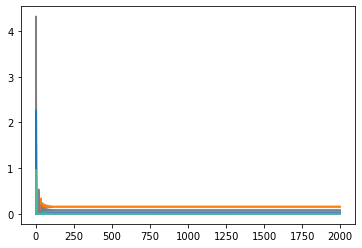

pruned node 3 with biomass 3.5e-323
pruned node 5 with biomass 3e-323
pruned node 8 with biomass 3.5e-323
pruned node 12 with biomass 3.1877501970254897e-273
pruned node 20 with biomass 3e-323
pruned node 23 with biomass 6.985927196954673e-273
pruned node 24 with biomass 1.5066506166436008e-272
pruned node 25 with biomass 3e-323
pruned node 26 with biomass 4.088510598497056e-273
./paper_webs_0624/web_0 final nodes: 21
final number of species after 2000 timesteps: 21
time for ./paper_webs_0624/web_0 630.5933449268341
pruned node 0 with biomass 3e-323
pruned node 3 with biomass 1.8318295865841704e-144
pruned node 4 with biomass 3e-323
pruned node 5 with biomass 3.5e-323
pruned node 6 with biomass 4.814903110484445e-267
pruned node 8 with biomass 3e-323
pruned node 9 with biomass 1.9403126364386327e-11
pruned node 10 with biomass 3.5e-323
pruned node 11 with biomass 3e-323
pruned node 13 with biomass 6.186408874944755e-276
pruned node 15 with biomass 3.5e-323
pruned node 16 with biomass 2

pruned node 24 with biomass 6.3002149861733e-310
pruned node 27 with biomass 3e-323
pruned node 28 with biomass 3e-323
./paper_webs_0624/web_93 final nodes: 15
final number of species after 2000 timesteps: 15
time for ./paper_webs_0624/web_93 416.22649455070496
pruned node 0 with biomass 3e-323
pruned node 2 with biomass 5.486829419952307e-198
pruned node 5 with biomass 4.85574465653579e-11
pruned node 6 with biomass 3e-323
pruned node 7 with biomass 3.0285617674677592e-198
pruned node 8 with biomass 3e-323
pruned node 10 with biomass 9.298158507427025e-12
pruned node 12 with biomass 3e-323
pruned node 13 with biomass 1.3553927016976728e-196
pruned node 14 with biomass 8.778358375699195e-12
pruned node 17 with biomass 1.8866562503258142e-200
pruned node 18 with biomass 4.6340926169806563e-197
pruned node 19 with biomass 9.186015304518414e-12
pruned node 21 with biomass 3e-323
pruned node 23 with biomass 6.865334962867302e-200
pruned node 24 with biomass 8.623146455974335e-12
pruned nod

In [3]:
# Run webs for 2000 timesteps to get them to a stable state

webs0 = []
valid_webs_file = open('./' + out_location +  '/valid_webs.txt','r')
ct = 0 
for row in valid_webs_file:
    if ct == 0:
        webs0.append(["./" + out_location + "/web_" + str(int(row)),2000,True])
    else:
        webs0.append(["./" + out_location + "/web_" + str(int(row)),2000,False])
    ct += 1
valid_webs_file.close()
    
#parallelize + run (because each simulation takes a while!)
# 5/11 start 11:08, end 11:21
p = Pool(multiprocessing.cpu_count())
p.map(ATN.run_dynamics, webs0)
p.close()
p.join() #wait    

In [4]:
ct = 0
valid_webs_file = open('./' + out_location + '/valid_webs.txt','r')
fifteen_webs_file = open('./' + out_location + '/over15_webs.txt','w')
for row in valid_webs_file:
    web,_,_,_,_ = niche.read_web_from_file("./" + out_location + "/web_" + str(int(row))+ "_2000")
    final_S = len(web.nodes())
    if final_S >= 15:
        fifteen_webs_file.write(str(row))
        ct+=1
valid_webs_file.close()
fifteen_webs_file.close()
print("count - " + str(ct))

count - 37
